In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample


In [2]:
data = pd.read_csv('bank-additional-full.csv', delimiter=';')
df = data.copy()

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.shape

(41188, 21)

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Label Distribution

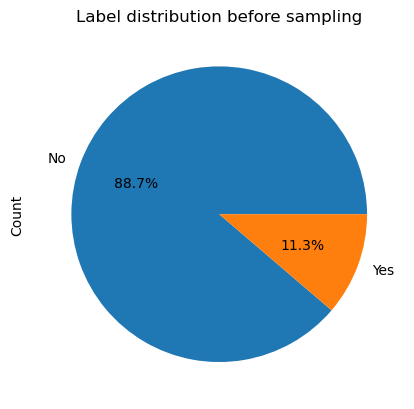

In [6]:
df['y'].value_counts().plot(kind='pie', labels=['No', 'Yes'], autopct='%1.1f%%')

# axs[i].pie([no_count, yes_count], labels=['No', 'Yes'], autopct='%1.1f%%')

# Set the plot title and labels
plt.title('Label distribution before sampling')
plt.ylabel('Count')

# Show the plot
plt.show()

### Hypothesis 1:    "Examining the impact of campaigns on different marital statuses"

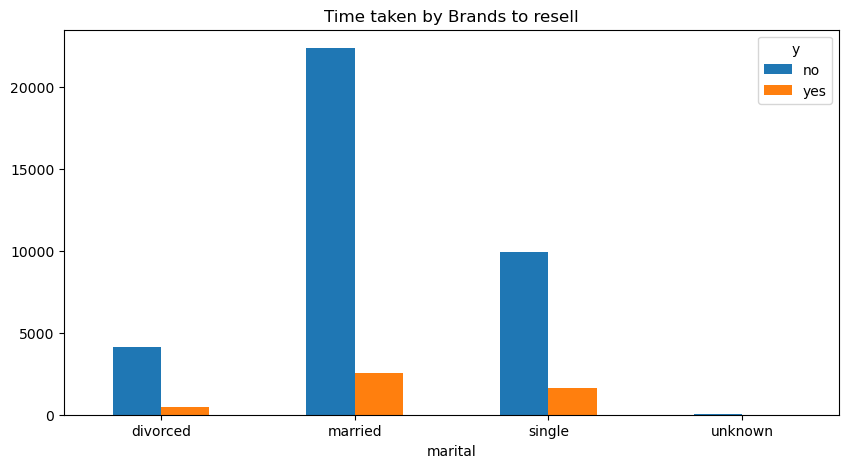

In [7]:
crosstb = pd.crosstab(df.marital,df.y)
ax = crosstb.plot(kind='bar', figsize=(10, 5), title='Time taken by Brands to resell')
ax.set_xticklabels(crosstb.index, rotation=0)
plt.show()

### Hypothesis 2: Impact of Campaign on educated people 

In [8]:
group = df.groupby(['education','y']).agg({
    'y':'count'}).rename(columns={'y': 'value_count'}).reset_index()
print(group)

              education    y  value_count
0              basic.4y   no         3748
1              basic.4y  yes          428
2              basic.6y   no         2104
3              basic.6y  yes          188
4              basic.9y   no         5572
5              basic.9y  yes          473
6           high.school   no         8484
7           high.school  yes         1031
8            illiterate   no           14
9            illiterate  yes            4
10  professional.course   no         4648
11  professional.course  yes          595
12    university.degree   no        10498
13    university.degree  yes         1670
14              unknown   no         1480
15              unknown  yes          251


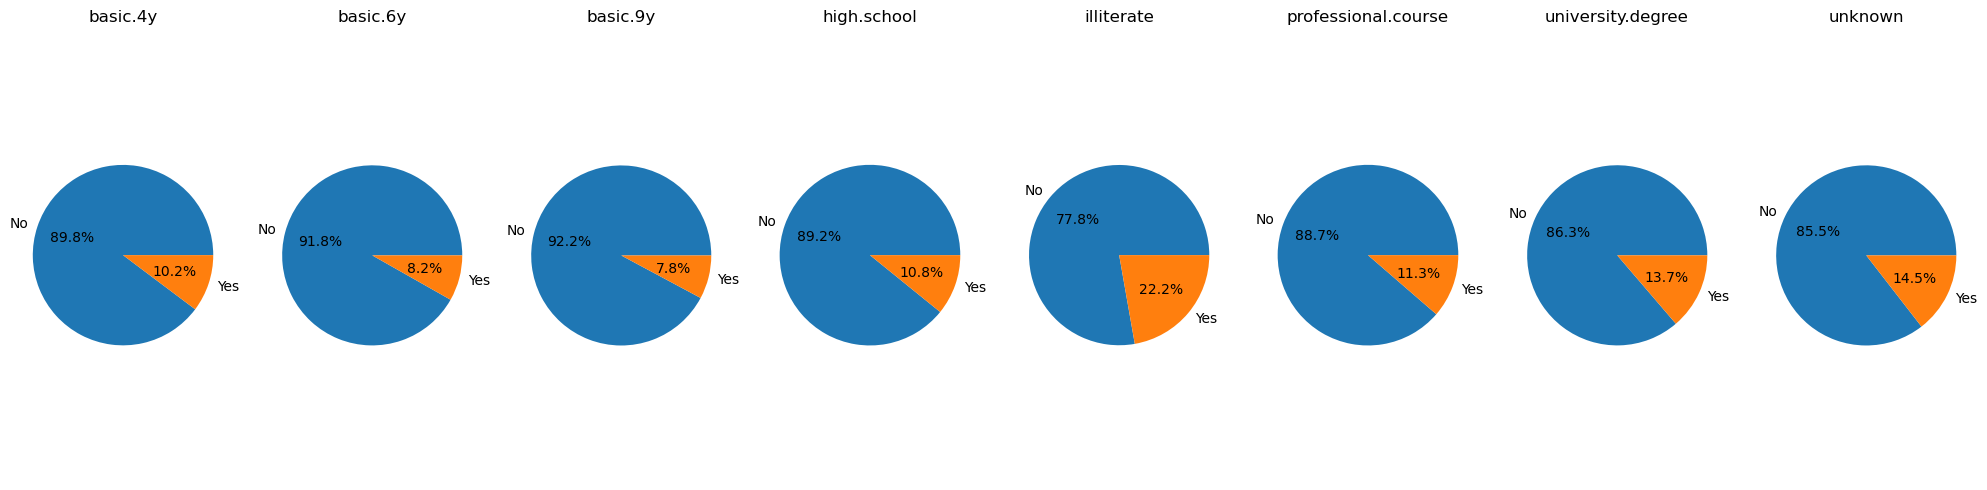

In [20]:
education_categories = group['education'].unique()
fig, axs = plt.subplots(1, len(education_categories), figsize=(20, 5))

for i, edu_category in enumerate(education_categories):
    edu_data = group[group['education'] == edu_category]
    
    no_count = edu_data[edu_data['y'] == 'no']['value_count'].iloc[0]
    yes_count = edu_data[edu_data['y'] == 'yes']['value_count'].iloc[0]
    
    axs[i].set_title(edu_category)
    axs[i].pie([no_count, yes_count], labels=['No', 'Yes'], autopct='%1.1f%%')
    axs[i].axis('equal')

plt.tight_layout()
plt.show()

In [21]:
data = df.groupby(['housing','loan','y']).agg({
    'y':'count'}).rename(columns={'y': 'value_count'}).reset_index()
Nhouse_Yloan = data[((data['housing'] == 'yes') & (data['loan'] == 'no') | 
                    (data['housing'] == 'no') & (data['loan'] == 'yes'))].groupby('y').agg({
    'value_count':'sum'}).reset_index()
Nhouse_Nloan = data[((data['housing'] == 'no') & (data['loan'] == 'no'))].drop(columns=['housing','loan'], axis=1)
Yhouse_Yloan = data[((data['housing'] == 'yes') & (data['loan'] == 'yes'))].drop(columns=['housing','loan'], axis=1)
result = pd.concat([Nhouse_Yloan, Nhouse_Nloan, Yhouse_Yloan], axis=0)
result['Label'] = ['House_or_loan', 'House_or_loan', 'None_of_it', 'None_of_it', 'House_and_loan', 'House_and_loan']

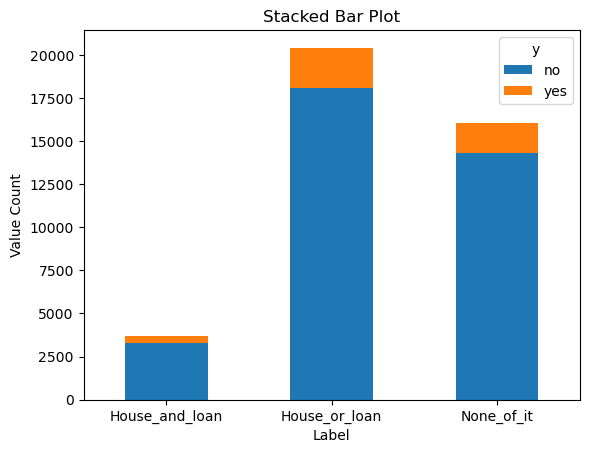

In [22]:
# Pivot the dataframe to rearrange the data for plotting
pivoted_data = result.pivot(index='Label', columns='y', values='value_count')

# Plot the stacked bar chart
ax = pivoted_data.plot(kind='bar', stacked=True)

# Set the plot title and labels
plt.title('Stacked Bar Plot')
plt.xlabel('Label')
plt.ylabel('Value Count')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()

### UnderSampling the majority label

In [23]:
minority_class = df[df['y'] == 'yes']
majority_class = df[df['y'] == 'no']
desired_majority_size = 2 * len(minority_class) 

In [24]:
undersampled_majority = resample(majority_class, replace=False, n_samples=desired_majority_size, random_state=42)

In [25]:
dataset = pd.concat([minority_class, undersampled_majority])

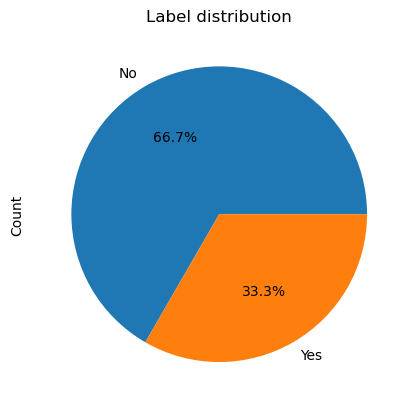

In [26]:
dataset['y'].value_counts().plot(kind='pie', labels=['No', 'Yes'], autopct='%1.1f%%')

# axs[i].pie([no_count, yes_count], labels=['No', 'Yes'], autopct='%1.1f%%')

# Set the plot title and labels
plt.title('Label distribution')
plt.ylabel('Count')

# Show the plot
plt.show()

In [27]:
features = dataset.iloc[:,:14]
outcome = dataset.iloc[:,14]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(features,outcome, test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

NameError: name 'train_test_split' is not defined